In [ ]:
import pandas as pd
import numpy as np

# Membaca file CSV dengan encoding 'latin1'
df = pd.read_csv('cleaned_data.csv', encoding='latin1')

# Menampilkan data
print(df)

                                                  Pesan  Kategori  \
0     Pergi sampai jurong point, gila.. Hanya tersed...         0   
1                    Ok lar... Bercanda denganmu oni...         0   
2     Entri gratis dalam 2 minggu berturut-turut unt...         1   
3     Kamu tidak bilang pagi-pagi sekali, hor... Kam...         0   
4     Tidak, menurutku dia tidak pergi ke usf, dia t...         0   
...                                                 ...       ...   
6710     Yooo sama2, oke nanti aku umumin di grup kelas         0   
6711  ð sebelumnya ga ad nulis kerudung. Kirain w...         0   
6712                               Mba mau kirim 300 ya         0   
6713  nama1  beaok bwrangkat pagi...mau cas atay tra...         0   
6714                         No bri atas nama kamu mana         0   

                                             text_clean  length_after_cleaning  
0     pergi jurong point gila tersedia bugis great w...                     85  
1        

In [ ]:
# Menampilkan label kolom
print(df.columns)

Index(['Pesan', 'Kategori', 'text_clean', 'length_after_cleaning'], dtype='object')


In [ ]:
# Mengisi nilai NaN dengan string kosong
df['text_clean'].fillna('', inplace=True)

In [ ]:
# Menetapkan x dan y
x = df['text_clean']
y = df['Kategori']

In [ ]:
# Menampilkan x dan y untuk verifikasi
print(x.head())
print(y.head())

0    pergi jurong point gila tersedia bugis great w...
1                         ok lar bercanda denganmu oni
2    entri gratis minggu berturutturut memenangkan ...
3                           bilang pagipagi hor bilang
4                          menurutku pergi usf tinggal
Name: text_clean, dtype: object
0    0
1    0
2    1
3    0
4    0
Name: Kategori, dtype: int64


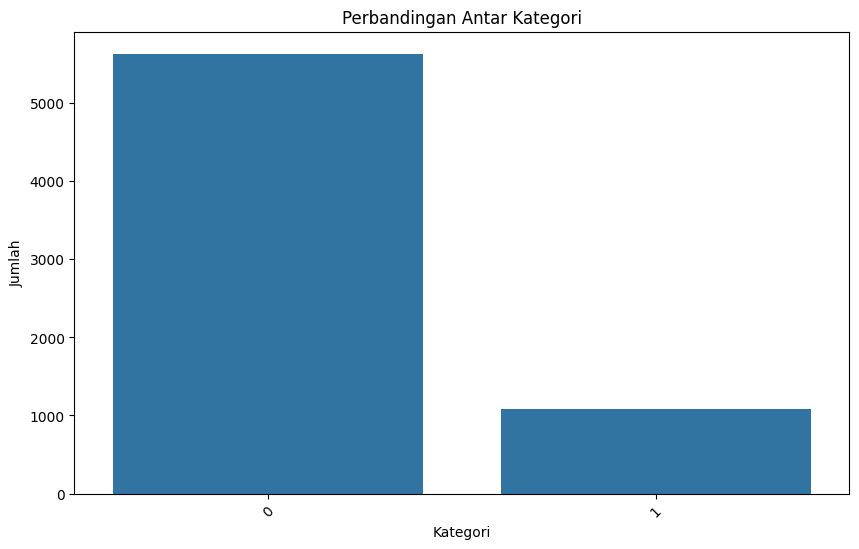

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah kategori
category_counts = df['Kategori'].value_counts().reset_index()
category_counts.columns = ['Kategori', 'Jumlah']

# Membuat diagram batang dengan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Kategori', y='Jumlah', data=category_counts)
plt.title('Perbandingan Antar Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Melakukan pembagian data menjadi training dan testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x_train_vect = vectorizer.fit_transform(x_train)
x_test_vect = vectorizer.transform(x_test)

In [ ]:
# Menggunakan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_vect, y_train)

In [ ]:
# Menampilkan perbandingan jumlah kategori sebelum dan sesudah oversampling
print("Jumlah kategori sebelum oversampling:")
print(y_train.value_counts())
print("\nJumlah kategori setelah oversampling:")
print(pd.Series(y_train_smote).value_counts())

Jumlah kategori sebelum oversampling:
Kategori
0    4520
1     852
Name: count, dtype: int64

Jumlah kategori setelah oversampling:
Kategori
0    4520
1    4520
Name: count, dtype: int64


# Modelling

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk mengevaluasi model
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Dictionary untuk menyimpan hasil evaluasi
results = {}

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Naive Bayes
nb = MultinomialNB()
nb.fit(x_train_smote, y_train_smote)
acc_nb, _, _, _ = evaluate_model(nb, x_test_vect, y_test)
results['Naive Bayes'] = acc_nb
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb.predict(x_test_vect)))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1113
           1       0.82      0.90      0.86       230

    accuracy                           0.95      1343
   macro avg       0.90      0.93      0.92      1343
weighted avg       0.95      0.95      0.95      1343



# SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train_smote, y_train_smote)
acc_svm, _, _, _ = evaluate_model(svm, x_test_vect, y_test)
results['SVM'] = acc_svm
print("SVM Classification Report:")
print(classification_report(y_test, svm.predict(x_test_vect)))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1113
           1       0.53      0.73      0.62       230

    accuracy                           0.84      1343
   macro avg       0.74      0.80      0.76      1343
weighted avg       0.87      0.84      0.85      1343



# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train_smote, y_train_smote)
acc_rf, _, _, _ = evaluate_model(rf, x_test_vect, y_test)
results['Random Forest'] = acc_rf
print("Random Forest Classification Report:")
print(classification_report(y_test, rf.predict(x_test_vect)))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1113
           1       0.56      0.93      0.70       230

    accuracy                           0.86      1343
   macro avg       0.77      0.89      0.81      1343
weighted avg       0.91      0.86      0.88      1343



# CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Menggunakan Tokenizer untuk mempersiapkan data untuk CNN
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [ ]:
# Padding sequences agar memiliki panjang yang sama
maxlen = 100
x_train_pad = pad_sequences(x_train_seq, padding='post', maxlen=maxlen)
x_test_pad = pad_sequences(x_test_seq, padding='post', maxlen=maxlen)

In [ ]:
# Oversampling data yang sudah diproses untuk CNN
x_train_pad_smote, y_train_smote = smote.fit_resample(x_train_pad, y_train)

# Membangun model CNN
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model CNN
model.fit(x_train_pad_smote, y_train_smote, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
226/226 [==============================] - 25s 97ms/step - loss: 0.3094 - accuracy: 0.8711 - val_loss: 0.3392 - val_accuracy: 0.8689
Epoch 2/5
226/226 [==============================] - 13s 58ms/step - loss: 0.1120 - accuracy: 0.9646 - val_loss: 0.3433 - val_accuracy: 0.8673
Epoch 3/5
226/226 [==============================] - 12s 55ms/step - loss: 0.0499 - accuracy: 0.9870 - val_loss: 0.5456 - val_accuracy: 0.8308
Epoch 4/5
226/226 [==============================] - 13s 57ms/step - loss: 0.0221 - accuracy: 0.9947 - val_loss: 0.4074 - val_accuracy: 0.8767
Epoch 5/5
226/226 [==============================] - 13s 56ms/step - loss: 0.0095 - accuracy: 0.9982 - val_loss: 0.5039 - val_accuracy: 0.8678


In [ ]:
# Mengevaluasi model CNN
y_pred_cnn = (model.predict(x_test_pad) > 0.5).astype("int32")
acc_cnn = accuracy_score(y_test, y_pred_cnn)
results['CNN'] = acc_cnn
print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))

42/42 [==============================] - 1s 12ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1113
           1       0.82      0.94      0.87       230

    accuracy                           0.95      1343
   macro avg       0.90      0.95      0.92      1343
weighted avg       0.96      0.95      0.96      1343



# Hasil Perbandingan Model

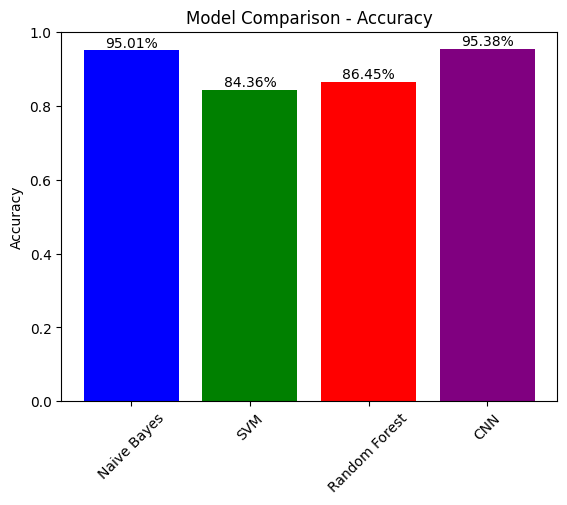

In [ ]:
# Nama model
models = ['Naive Bayes', 'SVM', 'Random Forest', 'CNN']

# Akurasi model
accuracies = [results['Naive Bayes'], results['SVM'], results['Random Forest'], results['CNN']]

# Membuat bar chart
fig, ax = plt.subplots()
bars = ax.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

# Menambahkan label persentase di atas bar chart
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{acc:.2%}', ha='center', va='bottom')

plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Menyimpan model
model.save('spam_detection_cnn_model.h5')

In [ ]:
import pickle

# Menyimpan tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Contoh penggunaan model yang telah disimpan
# Memuat kembali model dan tokenizer
from keras.models import load_model

# Memuat model
loaded_model = load_model('spam_detection_cnn_model.h5')

# Memuat tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

# Contoh prediksi
new_texts = ["Tolong belikan dulu mama pulsa 25rb di no AS baru mama 085245318024 soalnya teman mama kecelakaan"]
new_texts_seq = loaded_tokenizer.texts_to_sequences(new_texts)
new_texts_pad = pad_sequences(new_texts_seq, padding='post', maxlen=maxlen)
predictions = (loaded_model.predict(new_texts_pad) > 0.5).astype("int32")
print("Prediksi:", predictions)

1/1 [==============================] - 0s 133ms/step
Prediksi: [[1]]
